#### Objective

Understand the 8 patterns that is used frequently in Python, which fall under Creational, Structural & Behavioral patterns

- Factory (Used for creating different types of instances using the factory Object) 
- Builder (Doing what the factory object does, with control of the ingredients used)
- Singleton (Solves the problem of sharing the object states with other instances) 
- Observer (Provides the ability to notify / share info to multiple subscribers from a single publisher) 
- Strategy (Activity / strategy itself is created as a instance, and instantiated over data)
- Adapter  (As the name suggest, its kind of API around another object)
- Facade (Used for covering/ abstracting the complexity in the system)
- Iterator (Use the __iter__ and __next__ methods to implement object iteration)

In [166]:
## Factory Pattern
## We use the different types of the instances using the methods
class Burger:
    def __init__(self, ingre):
        self.ingre = ingre

    def print(self):
        print(self.ingre)

class BurgerFactory:
    
    def createCheeseBurger(self):
        ingredients = ['bun','cheese','beef-patty']
        return Burger(ingredients)
    
    def createDeluxeBurger(self):
        ingredients = ['bun','cheese','beef-patty','tomato','lettuce']
        return Burger(ingredients)
    
    def createVeganBurger(self):
        ingredients = ['bun','special-sauce','veg-patty']
        return Burger(ingredients)

In [167]:
burgerFactory = BurgerFactory()
burgerFactory.createCheeseBurger().print()
burgerFactory.createDeluxeBurger().print()
burgerFactory.createVeganBurger().print()


['bun', 'cheese', 'beef-patty']
['bun', 'cheese', 'beef-patty', 'tomato', 'lettuce']
['bun', 'special-sauce', 'veg-patty']


In [168]:
class Burger:
    def __init__(self):
        self.buns = None
        self.patty = None
        self.cheese = None

    def setBuns(self, bunStyle):
        self.buns = bunStyle

    def setPatty(self, pattyType):
        self.patty = pattyType

    def setCheese(self, cheeseVariant):
       self.cheese = cheeseVariant
    
    def __str__(self):
        return f'{self.buns} + {self.cheese} + {self.patty}'
    
    def __repr__(self):
        return f'The bun is {self.buns}, cheese is {self.cheese} and patty is {self.patty}'

## Builder Pattern. We can use dot operator to initialize and build the instance
## Here also different types of instances are built, with better knowledge on the ingredients
class BurgerBuilder:
    def __init__(self):
        self.burger = Burger()

    def addBuns(self, bunStyle):
        self.burger.setBuns(bunStyle)
        return self

    def addPatty(self, pattyStyle):
        self.burger.setPatty(pattyStyle)
        return self

    def addCheese(self, cheeseStyle):
        self.burger.setCheese(cheeseStyle)
        return self

    def build(self):
        return self.burger
    

In [169]:
burger = BurgerBuilder() \
            .addBuns('Multi-grain') \
            .addCheese('Cottage') \
            .addPatty('Chicken-Patty') \
            .build()

In [170]:
burger

The bun is Multi-grain, cheese is Cottage and patty is Chicken-Patty

In [171]:
print(burger)

Multi-grain + Cottage + Chicken-Patty


In [172]:
#Singleton pattern. USeful when a single instance only can be created, or when each 
#instance created can communicate with each other. 
# There is a class attribute which get assigned using a static method
class ApplicationState:
    instance = None

    def __init__(self):
        self.isLoggedIn = False

    @staticmethod
    def getAppState():
        if not ApplicationState.instance:
            ApplicationState.instance = ApplicationState()
        return ApplicationState.instance

#Never create an instance more than once

appState1 = ApplicationState.getAppState()

In [173]:
appState1.isLoggedIn

False

In [174]:
appState1.isLoggedIn = True
print(appState1.isLoggedIn)

True


In [175]:
appState2 = ApplicationState.getAppState()
#We did not set isLoggedIn variable...
appState2.isLoggedIn

True

In [176]:
## Pubsub or Observer pattern
# Youtube is the publisher (subject) and subscribers (observers) are those who get the updates

class YoutubeChannel:
    def __init__(self, name):
        self.name = name
        self.subscribers = []

    def subscribe(self, sub):
        self.subscribers.append(sub)

    def notify(self, event):
        for sub in self.subscribers:
            sub.sendNotification(self.name, event)

#One of the use cases of Abstract Base Class
from abc import  ABC, abstractmethod

class YoutubeSubscriber(ABC):
    @abstractmethod
    def sendNotification(self, event):
        pass

class YoutubeUser(YoutubeSubscriber):
    def __init__(self, name):
        self.name = name

    def sendNotification(self, channel, event):
        print(f"User {self.name} recieved notification from channel {channel}: {event}")


In [177]:
channel = YoutubeChannel('IB')

channel.subscribe(YoutubeUser('name1'))
channel.subscribe(YoutubeUser('name2'))
channel.subscribe(YoutubeUser('name3'))

# Once the notify method is triggered, all the YT users will recieve notifications
channel.notify(event='This is neat')

User name1 recieved notification from channel IB: This is neat
User name2 recieved notification from channel IB: This is neat
User name3 recieved notification from channel IB: This is neat


In [178]:
#Iterator is a pattern that defines how the objects inside an iterator is iterated

myList = [1,2,3]

#using the in keyword to iterate uses built-in list iterators
#When custom obj like binary tree, linked lists the iterator has to be defined

for n in myList:
    print(n)

1
2
3


In [179]:
class ListNode:
    def __init__(self,val):
        self.val = val
        self.next = None

class LinkedList:
    def __init__(self, head) -> None:
        self.head = head
        self.cur = None

    def __iter__(self):
        self.cur = self.head
        return self
    
    def __next__(self):
        if self.cur:
            val = self.cur.val
            self.cur = self.cur.next
            return val

        else:
            raise StopIteration

In [180]:
head = ListNode(1)
head.next = ListNode(2)
head.next.next = ListNode(3)
myList = LinkedList(head)

for n in myList:
    print(n)

1
2
3


In [181]:
# Behavioural Strategy Patterns : Open Closed principle 

### A class is Open for Extension... Closed for modifications

# Ex: We can filter array to remove positive vals in array or odd values. In future some thing else

In [182]:
class FilterStrategy(ABC):

    @abstractmethod
    def removeValue(self, val):
        pass

class RemoveNegativeStrategy(FilterStrategy):

    def removeValue(self, val):
        return val < 0

class RemoveOddStrategy(FilterStrategy):

    def removeValue(self, val):
        return abs(val) % 2

In [183]:
class Values:
    def __init__(self, vals):
        self.vals = vals

    def filter(self, strategy):
        res = []
        for n in self.vals:
            if not strategy.removeValue(n):
                res.append(n)
        return res

In [184]:
values = Values([-5,7,-2,3,4,-6,-9])
print(values.filter(RemoveNegativeStrategy()))
print(values.filter(RemoveOddStrategy()))

# Note the values class is not modified. Its only extended with different strategy using a different 
# classes

[7, 3, 4]
[-2, 4, -6]


In [185]:
#Adapter Pattern, where the screw is modified with adapter to fit

class UsbCable:
    def __init__(self):
        self.isPlugged = False

    def plugUsb(self):
        self.isPlugged = True

class UsbPort:
    def __init__(self):
        self.portAvbl = True

    def plug(self, usb):
        if self.portAvbl:
            usb.plugUsb()
            self.portAvbl = False

usbCable = UsbCable()
usbPort = UsbPort()
usbPort.plug(usbCable)
usbPort.portAvbl

False

In [186]:
class MicroUsbCable:
    def __init__(self):
        self.isPlugged = False

    def plugMicroUsb(self):
        self.isPlugged = True

class MicroToUsbAdapter(UsbCable):
    def __init__(self,microUsbCable):
        self.microUsbCable = microUsbCable
        self.microUsbCable.plugMicroUsb()

microToUsbAdapter = MicroToUsbAdapter(MicroUsbCable())

usbPort2 = UsbPort()

usbPort2.plug(microToUsbAdapter)

## Facade Pattern

Class iterface is pleasant facade to the more complex and unpleasant reality that is hidden behind it
Facade is a usually a wrapper class, around the more complex multi-part systems

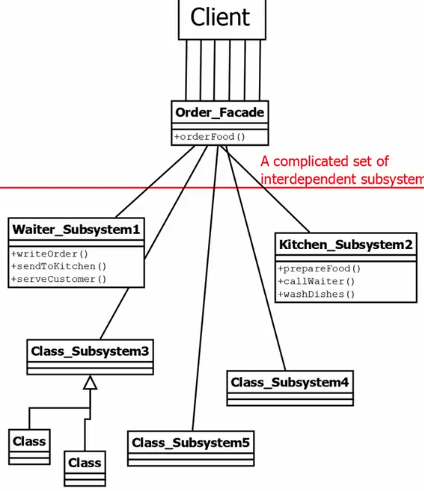

In [187]:
# Even dynamic arrays can have complexity, which can be hidden behind the Facade pattern

class Array:
    def __init__(self):
        self.capacity = 2
        self.length = 0
        self.arr = [0] * 2

    def pushback(self, n):
        if self.length == self.capacity:
            self.resize()

        self.arr[self.length] = n
        self.length += 1

    def resize(self):
        self.capacity = 2 * self.capacity
        newArr = [0] * self.capacity

        for i in range(self.length):
            newArr[i] = self.arr[i]
        
        return newArr

### Factory Pattern in-detail

Main challenge solved by Factory pattern is to avoid using if/elif/else conditional structures as it makes the code harder to read, harder to understand, and harder to maintain.

But why it is hard? 
Because the code/ method/ module is doing a lot more. Based on Single Responsibility principle, a module, class or method has to do only one thing. (So will this be the case in Python Modules too) 

When the code with multiple logical path is provided, look for the common interface. What is the input and the expected output?

Changing the code, without changing the behaviour is refactoring the code.



In [188]:
# Base code, that is not readable

# In serializer_demo.py

import json
import xml.etree.ElementTree as et

class Song:
    def __init__(self, song_id, title, artist):
        self.song_id = song_id
        self.title = title
        self.artist = artist


class SongSerializer:
    def serialize(self, song, format):
        if format == 'JSON':
            song_info = {
                'id': song.song_id,
                'title': song.title,
                'artist': song.artist
            }
            return json.dumps(song_info)
        elif format == 'XML':
            song_info = et.Element('song', attrib={'id': song.song_id})
            title = et.SubElement(song_info, 'title')
            title.text = song.title
            artist = et.SubElement(song_info, 'artist')
            artist.text = song.artist
            return et.tostring(song_info, encoding='unicode')
        else:
            raise ValueError(format)

In [189]:
# Improved & refactored serializer class with methods as interface
# This code can be still improved...

class SongSerializer:
    def serialize(self, song, format):
        if format == 'JSON':
            return self._serialize_to_json(song)
        elif format == 'XML':
            return self._serialize_to_xml(song)
        else:
            raise ValueError(format)

    def _serialize_to_json(self, song):
        payload = {
            'id': song.song_id,
            'title': song.title,
            'artist': song.artist
        }
        return json.dumps(payload)

    def _serialize_to_xml(self, song):
        song_element = et.Element('song', attrib={'id': song.song_id})
        title = et.SubElement(song_element, 'title')
        title.text = song.title
        artist = et.SubElement(song_element, 'artist')
        artist.text = song.artist
        return et.tostring(song_element, encoding='unicode')

Central idea in Factory Method is to provide a separate component with the responsibility to decide which concrete implementation should be used based on some specified parameter. That parameter in our example is the format.

In [190]:
# Two methods are implemented, serialize and _get_serializer

class SongSerializer:
    def serialize(self, song, format):
        serializer = self._get_serializer(format)
        return serializer(song)

    def _get_serializer(self, format):
        if format == 'JSON':
            return self._serialize_to_json
        elif format == 'XML':
            return self._serialize_to_xml
        else:
            raise ValueError(format)

    def _serialize_to_json(self, song):
        payload = {
            'id': song.song_id,
            'title': song.title,
            'artist': song.artist
        }
        return json.dumps(payload)

    def _serialize_to_xml(self, song):
        song_element = et.Element('song', attrib={'id': song.song_id})
        title = et.SubElement(song_element, 'title')
        title.text = song.title
        artist = et.SubElement(song_element, 'artist')
        artist.text = song.artist
        return et.tostring(song_element, encoding='unicode')

- .serialize() method is the app code, that depends on an interface to complete the task. 

- The above method becomes the **client** component and the **product** is the function that takes the Song object and returns the string

- The serializer methods are **concrete** implementations

- .get_serializer() is a **creator** component

The mechanics of Factory Method are always the same. A client (SongSerializer.serialize()) depends on a concrete implementation of an interface. It requests the implementation from a creator component (get_serializer()) using some sort of identifier (format).

In [191]:
class SongSerializer:
    def serialize(self, song, format):
        serializer = get_serializer(format)
        return serializer(song)


def get_serializer(format):
    if format == 'JSON':
        return _serialize_to_json
    elif format == 'XML':
        return _serialize_to_xml
    else:
        raise ValueError(format)


def _serialize_to_json(song):
    payload = {
        'id': song.song_id,
        'title': song.title,
        'artist': song.artist
    }
    return json.dumps(payload)


def _serialize_to_xml(song):
    song_element = et.Element('song', attrib={'id': song.song_id})
    title = et.SubElement(song_element, 'title')
    title.text = song.title
    artist = et.SubElement(song_element, 'artist')
    artist.text = song.artist
    return et.tostring(song_element, encoding='unicode')

Replacing complex logical code: Complex logical structures in the format if/elif/else are hard to maintain because new logical paths are needed as requirements change.

Factory Method is a good replacement because you can put the body of each logical path into separate functions or classes with a common interface, and the creator can provide the concrete implementation.

The parameter evaluated in the conditions becomes the parameter to identify the concrete implementation. The example above represents this situation.

Constructing related objects from external data: Imagine an application that needs to retrieve employee information from a database or other external source.

The records represent employees with different roles or types: managers, office clerks, sales associates, and so on. The application may store an identifier representing the type of employee in the record and then use Factory Method to create each concrete Employee object from the rest of the information on the record.

Supporting multiple implementations of the same feature: An image processing application needs to transform a satellite image from one coordinate system to another, but there are multiple algorithms with different levels of accuracy to perform the transformation.

The application can allow the user to select an option that identifies the concrete algorithm. Factory Method can provide the concrete implementation of the algorithm based on this option.

Combining similar features under a common interface: Following the image processing example, an application needs to apply a filter to an image. The specific filter to use can be identified by some user input, and Factory Method can provide the concrete filter implementation.

Integrating related external services: A music player application wants to integrate with multiple external services and allow users to select where their music comes from. The application can define a common interface for a music service and use Factory Method to create the correct integration based on a user preference.

In [192]:
# In serializers.py

import json
import xml.etree.ElementTree as et

class JsonSerializer:
    def __init__(self):
        self._current_object = None

    def start_object(self, object_name, object_id):
        self._current_object = {
            'id': object_id
        }

    def add_property(self, name, value):
        self._current_object[name] = value

    def to_str(self):
        return json.dumps(self._current_object)


class XmlSerializer:
    def __init__(self):
        self._element = None

    def start_object(self, object_name, object_id):
        self._element = et.Element(object_name, attrib={'id': object_id})

    def add_property(self, name, value):
        prop = et.SubElement(self._element, name)
        prop.text = value

    def to_str(self):
        return et.tostring(self._element, encoding='unicode')

In [193]:
class Song:
    def __init__(self, song_id, title, artist):
        self.song_id = song_id
        self.title = title
        self.artist = artist

    def serialize(self, serializer):
        serializer.start_object('song', self.song_id)
        serializer.add_property('title', self.title)
        serializer.add_property('artist', self.artist)
#In the method, the Song class uses the serializer object to write its own information without any knowledge of the format.

#As a matter of fact, the Song class doesn’t even know the goal is to convert the data to a string. This is important because you could use this interface to provide a different kind of serializer that converts the Song information to a completely different representation if needed.

In [194]:
# In serializers.py

class SerializerFactory:

    def __init__(self):
        self._creators = {}

    def register_format(self, format, creator):
        self._creators[format] = creator

    def get_serializer(self, format):
        creator = self._creators.get(format)
        if not creator:
            raise ValueError(format)
        return creator()


factory = SerializerFactory()
factory.register_format('JSON', JsonSerializer)
factory.register_format('XML', XmlSerializer)

In [195]:
import yaml

class YamlSerializer(JsonSerializer):
    def to_str(self):
        return yaml.dump(self._current_object)


factory.register_format('YAML', YamlSerializer)

Factory Method can be used to solve a wide range of problems. An Object Factory gives additional flexibility to the design when requirements change. Ideally, you’ll want an implementation of Object Factory that can be reused in any situation without replicating the implementation.

In [196]:
config = {
    'spotify_client_key': 'THE_SPOTIFY_CLIENT_KEY',
    'spotify_client_secret': 'THE_SPOTIFY_CLIENT_SECRET',
    'pandora_client_key': 'THE_PANDORA_CLIENT_KEY',
    'pandora_client_secret': 'THE_PANDORA_CLIENT_SECRET',
    'local_music_location': '/usr/data/music'
}

In [197]:
class SpotifyService:
    def __init__(self, access_code):
        self._access_code = access_code

    def test_connection(self):
        print(f'Accessing Spotify with {self._access_code}')


class SpotifyServiceBuilder:
    def __init__(self):
        self._instance = None

    def __call__(self, spotify_client_key, spotify_client_secret, **_ignored):
        if not self._instance:
            access_code = self.authorize(
                spotify_client_key, spotify_client_secret)
            self._instance = SpotifyService(access_code)
        return self._instance

    def authorize(self, key, secret):
        return 'SPOTIFY_ACCESS_CODE'

In [198]:

class PandoraService:
    def __init__(self, consumer_key, consumer_secret):
        self._key = consumer_key
        self._secret = consumer_secret

    def test_connection(self):
        print(f'Accessing Pandora with {self._key} and {self._secret}')


class PandoraServiceBuilder:
    def __init__(self):
        self._instance = None

    def __call__(self, pandora_client_key, pandora_client_secret, **_ignored):
        if not self._instance:
            consumer_key, consumer_secret = self.authorize(
                pandora_client_key, pandora_client_secret)
            self._instance = PandoraService(consumer_key, consumer_secret)
        return self._instance

    def authorize(self, key, secret):
        return 'PANDORA_CONSUMER_KEY', 'PANDORA_CONSUMER_SECRET'

In [199]:
# In music.py

class LocalService:
    def __init__(self, location):
        self._location = location

    def test_connection(self):
        print(f'Accessing Local music at {self._location}')


def create_local_music_service(local_music_location, **_ignored):
    return LocalService(local_music_location)

In [200]:
# In object_factory.py

class ObjectFactory:
    def __init__(self):
        self._builders = {}

    def register_builder(self, key, builder):
        self._builders[key] = builder

    def create(self, key, **kwargs):
        builder = self._builders.get(key)
        if not builder:
            raise ValueError(key)
        return builder(**kwargs)

In [201]:
factory = ObjectFactory()
factory.register_builder('SPOTIFY', SpotifyServiceBuilder())
factory.register_builder('PANDORA', PandoraServiceBuilder())
factory.register_builder('LOCAL', create_local_music_service)

In [202]:
pandora = factory.create('PANDORA', **config)
pandora.test_connection()

Accessing Pandora with PANDORA_CONSUMER_KEY and PANDORA_CONSUMER_SECRET


In [204]:
spotify = factory.create('SPOTIFY', **config)
spotify.test_connection()


Accessing Spotify with SPOTIFY_ACCESS_CODE


In [206]:
local = factory.create('LOCAL', **config)
local.test_connection()

Accessing Local music at /usr/data/music


In [208]:
pandora2 = services.get('PANDORA', **config)
print(f'id(pandora) == id(pandora2): {id(pandora) == id(pandora2)}')

NameError: name 'services' is not defined

In [209]:
class MusicServiceProvider(ObjectFactory):
    def get(self, service_id, **kwargs):
        return self.create(service_id, **kwargs)


services = MusicServiceProvider()
services.register_builder('SPOTIFY', SpotifyServiceBuilder())
services.register_builder('PANDORA', PandoraServiceBuilder())
services.register_builder('LOCAL', create_local_music_service)

In [210]:
pandora2 = services.get('PANDORA', **config)
print(f'id(pandora) == id(pandora2): {id(pandora) == id(pandora2)}')

spotify2 = services.get('SPOTIFY', **config)
print(f'id(spotify) == id(spotify2): {id(spotify) == id(spotify2)}')

id(pandora) == id(pandora2): False
id(spotify) == id(spotify2): False


What the Factory Method design pattern is and what its components are

How to refactor existing code to leverage Factory Method

Situations in which Factory Method should be used

How Object Factories provide more flexibility to implement Factory Method

How to implement a general purpose Object Factory and its challenges

How to specialize a general solution to provide a better context